In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

: 

In [11]:
df = pd.read_excel(r'data.xlsx', engine='openpyxl')
df.head(10)

,Name,Gender,Age,Height (cm),Weight (kg),Waist (cm),Smoking,Alcohol,Sleep Duration,Sleep Disturbances,...,Chest Pain,Exercise Angina,Swelling,Heartburn/Vomiting,Decreasing Exercise Tolerance,ECG Results,Old Peak (ST Depression),ST Slope,Echocardiogram,Heart Disease Confirmation
0,Dorothy Reid,Female,30,154.3,60.3,80.2,No,No,6-7 hours,No,...,No,No,No,Yes,No,ST-T wave abnormality,0.6,Down,Abnormal,No heart disease
1,Harold Gomez,Female,60,172.1,94.6,95.4,No,Occasionally,6-7 hours,No,...,No,Yes,No,No,No,ST-T wave abnormality,0.6,Down,Abnormal,No heart disease
2,Gabriel Wheeler,Male,55,181.5,65.4,78.4,Occasionally,Occasionally,4-5 hours,No,...,No,No,No,No,No,Normal,1.3,Flat,Normal,No heart disease
3,Darren Harrison,Male,56,172.5,81.5,86.0,No,No,<4 hours,Yes,...,No,Yes,No,No,No,Normal,1.4,Flat,Abnormal,No heart disease
4,Michelle Aguilar,Male,63,180.2,66.6,86.1,No,No,6-7 hours,No,...,No,No,No,No,No,LVH,0.1,Flat,Abnormal,No heart disease
5,Michael Valencia,Female,35,178.1,77.3,100.6,Occasionally,No,6-7 hours,Yes,...,No,Yes,No,No,No,LVH,1.0,Down,Normal,Heart disease present
6,Kimberly Henry,Female,53,161.5,70.7,81.1,No,No,4-5 hours,No,...,No,No,Yes,No,No,ST-T wave abnormality,0.6,Up,Normal,No heart disease
7,Jonathan Mcmahon,Female,39,161.2,74.2,74.6,Heavy smoker,No,8 hours,Yes,...,3,No,No,No,No,ST-T wave abnormality,1.8,Flat,Normal,No heart disease
8,John Lee,Female,54,162.2,78.9,82.2,No,Daily,6-7 hours,No,...,2,Yes,Yes,Yes,No,ST-T wave abnormality,0.7,Down,Normal,No heart disease
9,Chelsea Larson,Female,30,179.6,75.9,93.6,No,No,6-7 hours,Yes,...,No,No,No,No,No,LVH,0.7,Flat,Normal,Heart disease present


In [12]:
# Assuming `df` is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['Name', 'Gender', 'Smoking', 'Alcohol', 'Sleep Duration',
       'Sleep Disturbances', 'Physical Activity', 'Stress Level', 'Diabetes',
       'Asthma', 'COVID-19 History', 'Heart Disease History',
       'Family Heart Disease History', 'Thyroid Condition', 'COPD',
       'Hospital Admissions', 'Skin Color Change', 'Chest Pain',
       'Exercise Angina', 'Swelling', 'Heartburn/Vomiting',
       'Decreasing Exercise Tolerance', 'ECG Results', 'ST Slope',
       'Echocardiogram', 'Heart Disease Confirmation'],
      dtype='object')


In [23]:
numeric_columns = ["Age", "Height (cm)", "Weight (kg)", "Waist (cm)", "Systolic BP", "Diastolic BP", 
                   "Total Cholesterol (mg/dL)", "Triglycerides (TG) (mg/dL)", "LDL (mg/dL)", 
                   "HDL (mg/dL)", "Blood Sugar (Fasting) (mg/dL)", "Blood Sugar (After-fasting) (mg/dL)",
                   "HbA1c (%)", "Max Heart Rate", "Old Peak (ST Depression)"]

scaler = StandardScaler()


df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head(10)


,Age,Height (cm),Weight (kg),Waist (cm),Systolic BP,Diastolic BP,Total Cholesterol (mg/dL),Triglycerides (TG) (mg/dL),LDL (mg/dL),HDL (mg/dL),...,Exercise Angina_Yes,Swelling_Yes,Heartburn/Vomiting_Yes,Decreasing Exercise Tolerance_Yes,ECG Results_Normal,ECG Results_ST-T wave abnormality,ST Slope_Flat,ST Slope_Up,Echocardiogram_Normal,Heart Disease Confirmation_No heart disease
0,-1.132614,-1.519822,-0.611738,-0.476791,0.149271,-0.004500,-0.611852,-0.138079,-0.945219,0.011413,...,False,False,True,False,False,True,False,False,False,True
1,0.597801,0.251416,1.607846,0.800747,-1.722055,1.179612,0.180340,1.733525,-1.318713,-0.610088,...,True,False,False,False,False,True,False,False,False,True
2,0.309398,1.186790,-0.281712,-0.628078,1.193732,-0.063705,-1.590443,1.593592,-1.715550,1.367416,...,False,False,False,False,True,False,True,False,True,True
3,0.367079,0.291219,0.760133,0.010691,-0.764632,-0.478144,0.529837,-1.187576,0.642129,-1.288090,...,True,False,False,False,True,False,True,False,False,True
4,0.770842,1.057429,-0.204059,0.019096,1.672443,1.238818,-0.868150,1.471150,-1.738893,-1.683591,...,False,False,False,False,False,False,True,False,False,True
5,-0.844212,0.848463,0.488347,1.237800,-0.068325,-0.833378,-1.404045,1.803491,-0.991906,1.536917,...,True,False,False,False,False,False,False,False,True,False
6,0.194037,-0.803366,0.061255,-0.401147,-1.243344,-0.063705,-1.194347,-0.925202,1.622550,-0.553588,...,False,True,False,False,False,True,False,True,True,True
7,-0.613490,-0.833218,0.287744,-0.947463,-1.722055,-1.247817,-1.101148,-0.400453,0.898906,0.067913,...,False,False,False,False,False,True,True,False,True,True
8,0.251718,-0.733711,0.591885,-0.308694,-0.024806,0.232323,-0.774951,-0.103096,0.151919,0.915415,...,True,True,True,False,False,True,False,False,True,True
9,-1.132614,0.997725,0.397752,0.649460,0.584463,-0.537350,1.508428,0.841452,1.435803,1.367416,...,False,False,False,False,False,False,True,False,True,False


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [28]:
# df = df.drop(columns=['Name'])
print(df.head())
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)


        Age  Height (cm)  Weight (kg)  Waist (cm)  Systolic BP  Diastolic BP  \
0 -1.132614    -1.519822    -0.611738   -0.476791     0.149271     -0.004500   
1  0.597801     0.251416     1.607846    0.800747    -1.722055      1.179612   
2  0.309398     1.186790    -0.281712   -0.628078     1.193732     -0.063705   
3  0.367079     0.291219     0.760133    0.010691    -0.764632     -0.478144   
4  0.770842     1.057429    -0.204059    0.019096     1.672443      1.238818   

   Total Cholesterol (mg/dL)  Triglycerides (TG) (mg/dL)  LDL (mg/dL)  \
0                  -0.611852                   -0.138079    -0.945219   
1                   0.180340                    1.733525    -1.318713   
2                  -1.590443                    1.593592    -1.715550   
3                   0.529837                   -1.187576     0.642129   
4                  -0.868150                    1.471150    -1.738893   

   HDL (mg/dL)  ...  Exercise Angina_Yes  Swelling_Yes  \
0     0.011413  ...   

In [29]:
df.head(10)

,Age,Height (cm),Weight (kg),Waist (cm),Systolic BP,Diastolic BP,Total Cholesterol (mg/dL),Triglycerides (TG) (mg/dL),LDL (mg/dL),HDL (mg/dL),...,Exercise Angina_Yes,Swelling_Yes,Heartburn/Vomiting_Yes,Decreasing Exercise Tolerance_Yes,ECG Results_Normal,ECG Results_ST-T wave abnormality,ST Slope_Flat,ST Slope_Up,Echocardiogram_Normal,Heart Disease Confirmation_No heart disease
0,-1.132614,-1.519822,-0.611738,-0.476791,0.149271,-0.004500,-0.611852,-0.138079,-0.945219,0.011413,...,False,False,True,False,False,True,False,False,False,True
1,0.597801,0.251416,1.607846,0.800747,-1.722055,1.179612,0.180340,1.733525,-1.318713,-0.610088,...,True,False,False,False,False,True,False,False,False,True
2,0.309398,1.186790,-0.281712,-0.628078,1.193732,-0.063705,-1.590443,1.593592,-1.715550,1.367416,...,False,False,False,False,True,False,True,False,True,True
3,0.367079,0.291219,0.760133,0.010691,-0.764632,-0.478144,0.529837,-1.187576,0.642129,-1.288090,...,True,False,False,False,True,False,True,False,False,True
4,0.770842,1.057429,-0.204059,0.019096,1.672443,1.238818,-0.868150,1.471150,-1.738893,-1.683591,...,False,False,False,False,False,False,True,False,False,True
5,-0.844212,0.848463,0.488347,1.237800,-0.068325,-0.833378,-1.404045,1.803491,-0.991906,1.536917,...,True,False,False,False,False,False,False,False,True,False
6,0.194037,-0.803366,0.061255,-0.401147,-1.243344,-0.063705,-1.194347,-0.925202,1.622550,-0.553588,...,False,True,False,False,False,True,False,True,True,True
7,-0.613490,-0.833218,0.287744,-0.947463,-1.722055,-1.247817,-1.101148,-0.400453,0.898906,0.067913,...,False,False,False,False,False,True,True,False,True,True
8,0.251718,-0.733711,0.591885,-0.308694,-0.024806,0.232323,-0.774951,-0.103096,0.151919,0.915415,...,True,True,True,False,False,True,False,False,True,True
9,-1.132614,0.997725,0.397752,0.649460,0.584463,-0.537350,1.508428,0.841452,1.435803,1.367416,...,False,False,False,False,False,False,True,False,True,False


# logistic regression model 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [42]:
# Define X (features) and y (target)
X = df.drop(columns=["Heart Disease Confirmation_No heart disease"])
y = df["Heart Disease Confirmation_No heart disease"]
print (X)

          Age  Height (cm)  Weight (kg)  Waist (cm)  Systolic BP  \
0   -1.132614    -1.519822    -0.611738   -0.476791     0.149271   
1    0.597801     0.251416     1.607846    0.800747    -1.722055   
2    0.309398     1.186790    -0.281712   -0.628078     1.193732   
3    0.367079     0.291219     0.760133    0.010691    -0.764632   
4    0.770842     1.057429    -0.204059    0.019096     1.672443   
..        ...          ...          ...         ...          ...   
495 -1.017253     1.515165    -1.245905    0.456148     0.497424   
496 -0.844212     1.753984     0.507761   -0.619673     0.758540   
497  1.463008     0.947971     0.423636    0.775533    -0.242402   
498  0.597801     0.659398     0.423636    2.212763    -1.504459   
499 -0.036685    -0.166516     1.400771   -1.367705    -1.417420   

     Diastolic BP  Total Cholesterol (mg/dL)  Triglycerides (TG) (mg/dL)  \
0       -0.004500                  -0.611852                   -0.138079   
1        1.179612              

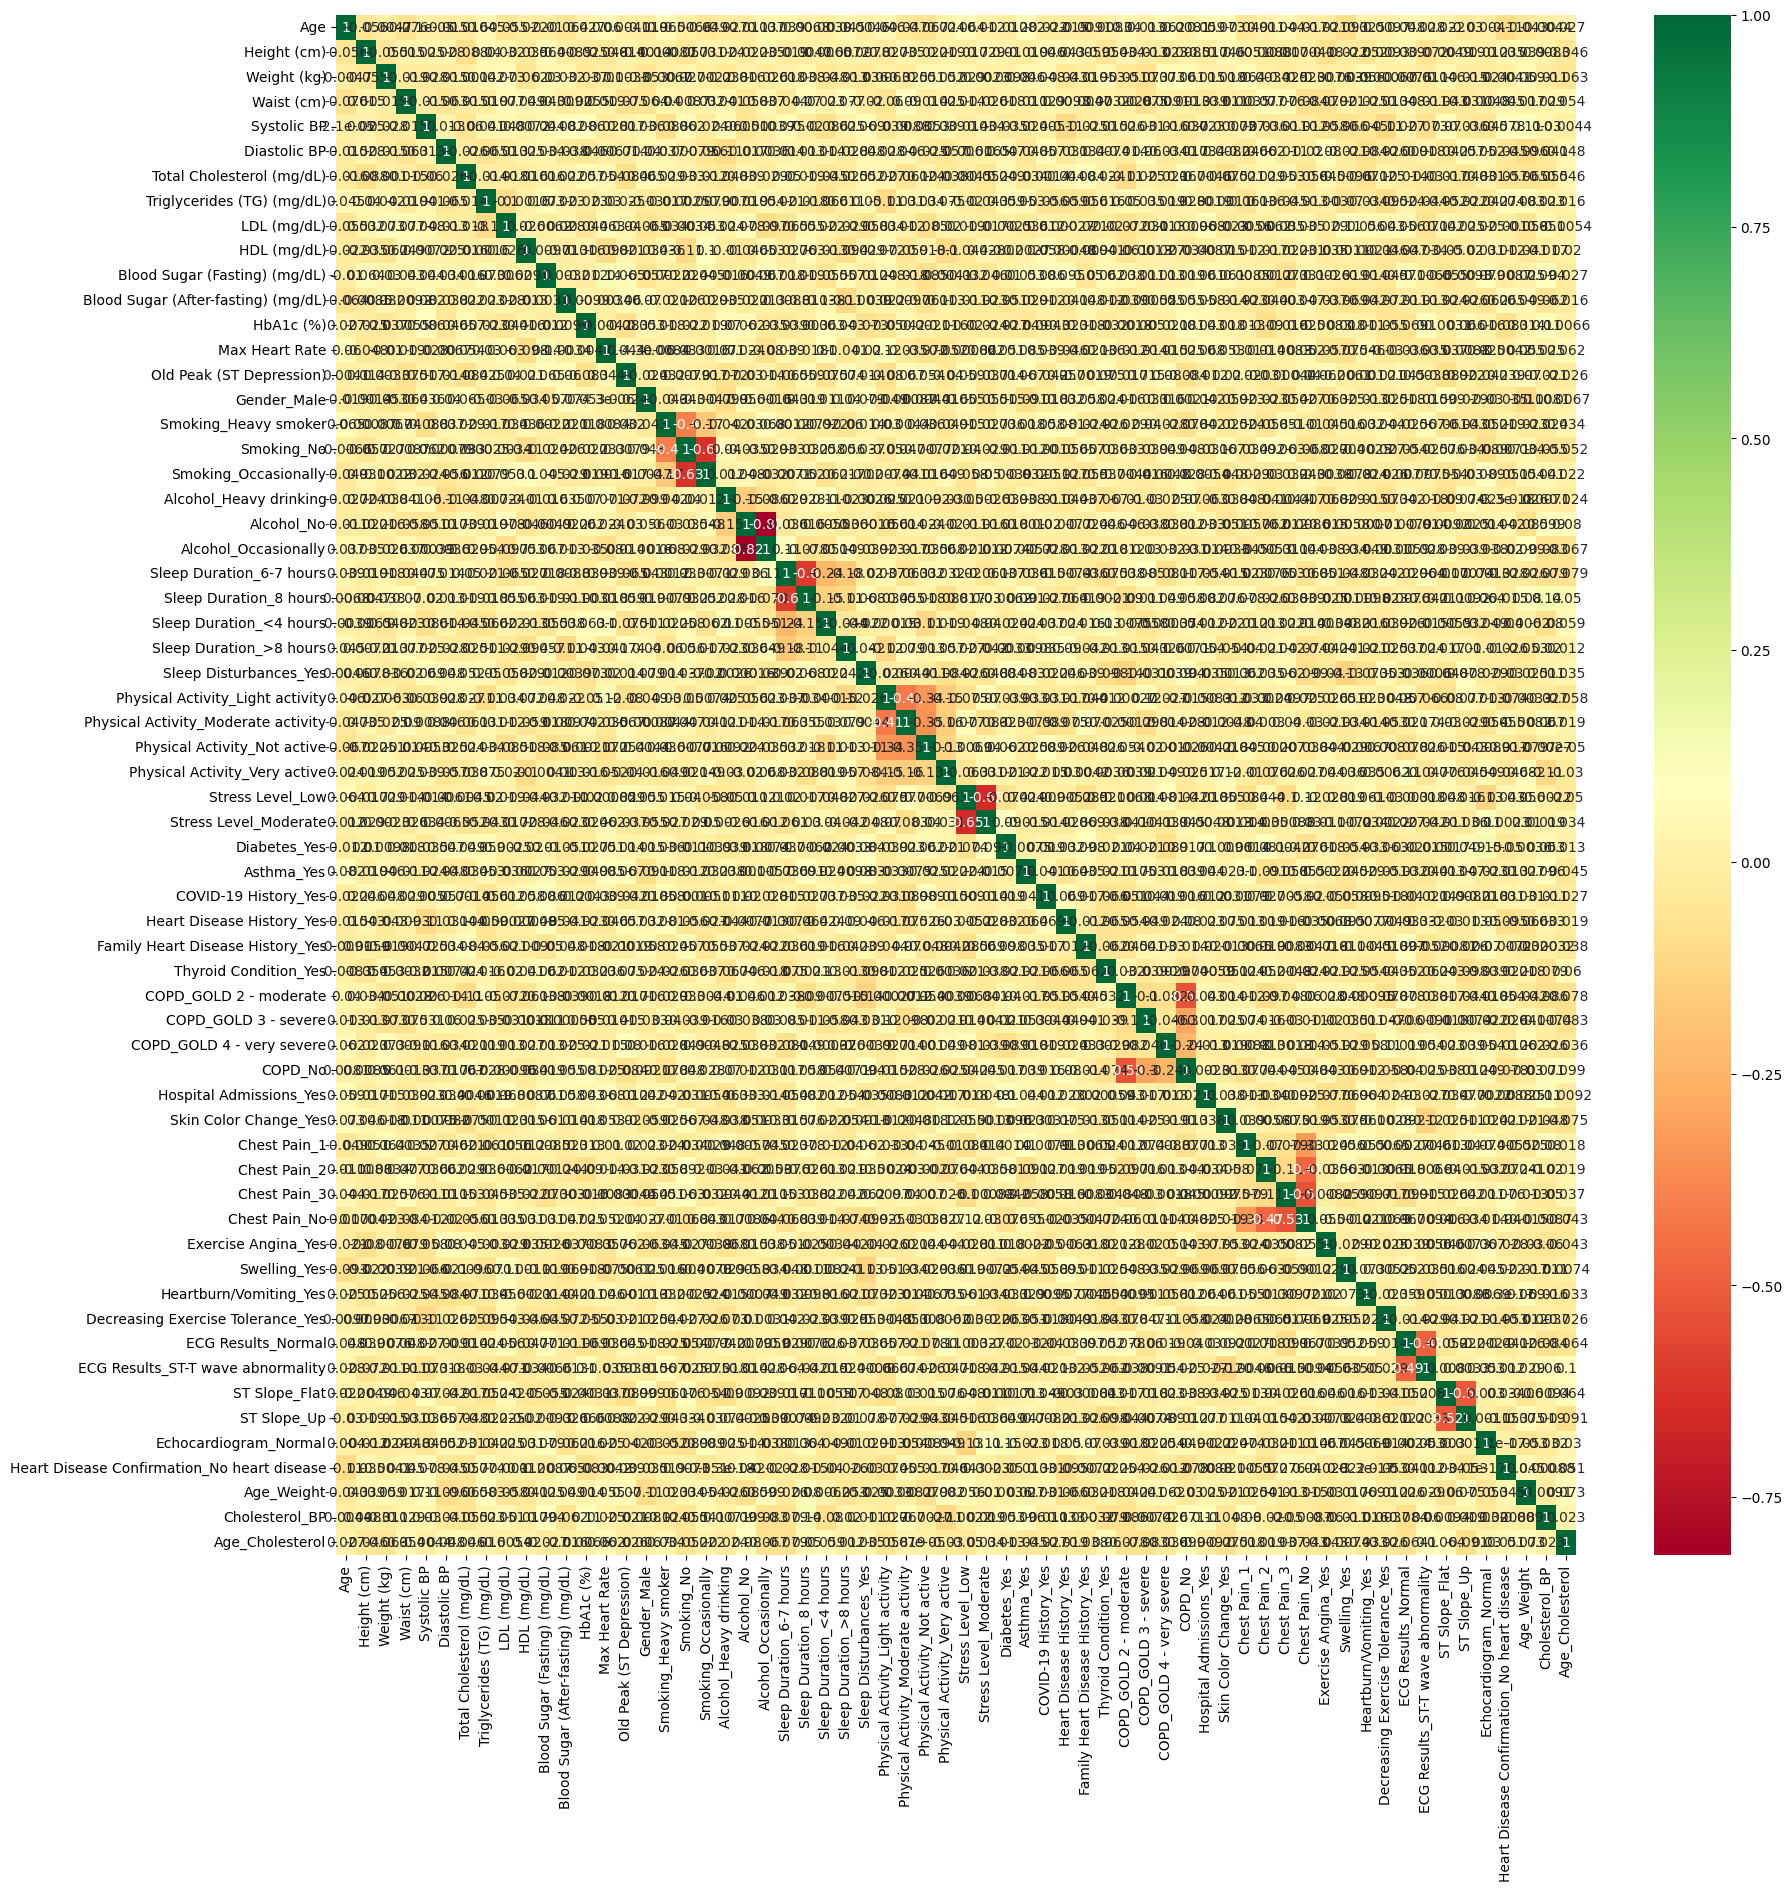

In [66]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (includes precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC Score (useful for evaluating binary classifiers)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.7
Confusion Matrix:
 [[ 2 20]
 [10 68]]
Classification Report:
               precision    recall  f1-score   support

       False       0.17      0.09      0.12        22
        True       0.77      0.87      0.82        78

    accuracy                           0.70       100
   macro avg       0.47      0.48      0.47       100
weighted avg       0.64      0.70      0.66       100

ROC-AUC Score: 0.4370629370629371


# LOGISTIC REGRESSION 2


In [46]:
# Example: Adding interaction terms
df['Age_Weight'] = df['Age'] * df['Weight (kg)']
df['Cholesterol_BP'] = df['Total Cholesterol (mg/dL)'] * df['Systolic BP']
df['Age_Cholesterol'] = df['Age'] * df['Total Cholesterol (mg/dL)']


In [48]:
X = df.drop(columns=["Heart Disease Confirmation_No heart disease"])
y = df["Heart Disease Confirmation_No heart disease"]

# Recursive Feature Elimination (RFE) for Feature Selection

In [49]:
from sklearn.feature_selection import RFE

# Initialize RFE with Logistic Regression
selector = RFE(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=15)
selector.fit(X, y)

# Select only the top features
X_selected = selector.transform(X)


## Split Data into Training and Testing Sets

In [50]:
from sklearn.model_selection import train_test_split

# Split the selected data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


## Grid Search for Hyperparameter Tuning (C Parameter)

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for regularization strength
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)

# Train using grid search on the training set
grid_search.fit(X_train, y_train)

# Use the best model found by grid search
log_reg_best = grid_search.best_estimator_
print("Best C parameter:", grid_search.best_params_)


Best C parameter: {'C': 0.01}


In [52]:
# Predict on the test set using the best model
y_pred = log_reg_best.predict(X_test)

# Evaluate the default threshold performance
accuracy = accuracy_score(y_test, y_pred)
print("Default Threshold Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC Score
y_pred_prob = log_reg_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Adjust Threshold (e.g., to 0.4)
y_pred_adjusted = (y_pred_prob >= 0.4).astype(int)

# Evaluate the adjusted threshold performance
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print("Adjusted Threshold Accuracy:", accuracy_adjusted)

conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix with Adjusted Threshold:\n", conf_matrix_adjusted)

class_report_adjusted = classification_report(y_test, y_pred_adjusted)
print("Classification Report with Adjusted Threshold:\n", class_report_adjusted)


Default Threshold Accuracy: 0.78
Confusion Matrix:
 [[ 0 22]
 [ 0 78]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100

ROC-AUC Score: 0.50495337995338
Adjusted Threshold Accuracy: 0.78
Confusion Matrix with Adjusted Threshold:
 [[ 0 22]
 [ 0 78]]
Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        22
        True       0.78      1.00      0.88        78

    accuracy                           0.78       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.61      0.78      0.68       100



d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\eda project\EDA-PROJ-2\venv-proj2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\e

### Dataset Using SMOTE


In [54]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


### Penalize Misclassification of the Minority Class

In [55]:
# Reinitialize logistic regression with balanced class weights
log_reg_balanced = LogisticRegression(C=0.01, max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)

# Predict and evaluate again
y_pred_balanced = log_reg_balanced.predict(X_test)
print("Balanced Class Weight Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Class Weight Accuracy: 0.55
Confusion Matrix:
 [[10 12]
 [33 45]]
Classification Report:
               precision    recall  f1-score   support

       False       0.23      0.45      0.31        22
        True       0.79      0.58      0.67        78

    accuracy                           0.55       100
   macro avg       0.51      0.52      0.49       100
weighted avg       0.67      0.55      0.59       100



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.76
Confusion Matrix:
 [[ 9 13]
 [11 67]]
Classification Report:
               precision    recall  f1-score   support

       False       0.45      0.41      0.43        22
        True       0.84      0.86      0.85        78

    accuracy                           0.76       100
   macro avg       0.64      0.63      0.64       100
weighted avg       0.75      0.76      0.76       100



In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

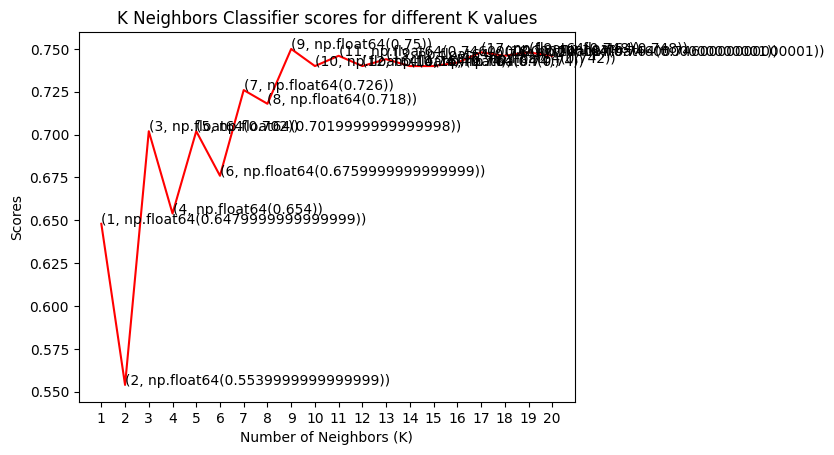

In [58]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [60]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [61]:
score.mean()

np.float64(0.75)

In [62]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [63]:
score.mean()

np.float64(0.6659999999999999)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
for i in range(1,35):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy at max depth {i} : {accuracy * 100:.2f}%")
    # print(classification_report(y_test, y_pred))

Accuracy at max depth 1 : 75.00%
Accuracy at max depth 2 : 75.00%
Accuracy at max depth 3 : 75.00%
Accuracy at max depth 4 : 73.00%
Accuracy at max depth 5 : 72.00%
Accuracy at max depth 6 : 72.00%
Accuracy at max depth 7 : 71.00%
Accuracy at max depth 8 : 61.00%
Accuracy at max depth 9 : 53.00%
Accuracy at max depth 10 : 60.00%
Accuracy at max depth 11 : 54.00%
Accuracy at max depth 12 : 56.00%
Accuracy at max depth 13 : 56.00%
Accuracy at max depth 14 : 56.00%
Accuracy at max depth 15 : 56.00%
Accuracy at max depth 16 : 56.00%
Accuracy at max depth 17 : 56.00%
Accuracy at max depth 18 : 56.00%
Accuracy at max depth 19 : 56.00%
Accuracy at max depth 20 : 56.00%
Accuracy at max depth 21 : 56.00%
Accuracy at max depth 22 : 56.00%
Accuracy at max depth 23 : 56.00%
Accuracy at max depth 24 : 56.00%
Accuracy at max depth 25 : 56.00%
Accuracy at max depth 26 : 56.00%
Accuracy at max depth 27 : 56.00%
Accuracy at max depth 28 : 56.00%
Accuracy at max depth 29 : 56.00%
Accuracy at max depth 3